## Importing necessary libraries

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve

## Loading the data

In [77]:
# Load the dataset
data = pd.read_csv("credit card fraud detection/creditcard.csv")

In [78]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [80]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [85]:
# Class distribution
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

## Separate the data into legitimate and fraudulent transactions

In [88]:
legit = data[data.Class == 0]
fraud = data[data.Class == 1]

In [90]:
# Descriptive statistics for legitimate transactions
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [92]:
# Descriptive statistics for fraudulent transactions
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

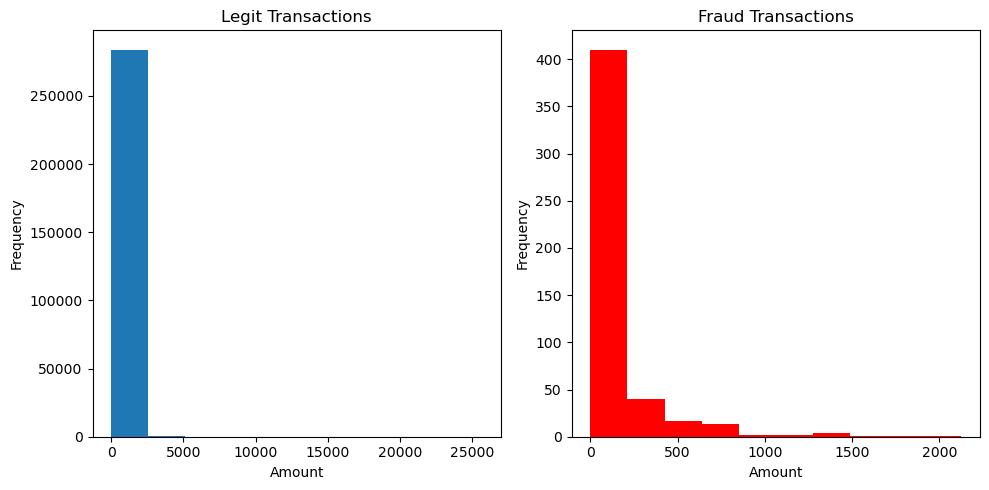

In [94]:
# Histograms
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
legit.Amount.plot(kind='hist', title='Legit Transactions')
plt.xlabel('Amount')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
fraud.Amount.plot(kind='hist', title='Fraud Transactions', color='red')
plt.xlabel('Amount')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [96]:
# Grouping by class and taking the mean of each feature
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [98]:
# Balancing the dataset by sampling from the legitimate transactions
sample = legit.sample(n=492)
new_data = pd.concat([sample, fraud], axis=0)

## New Dataset after Balancing

In [101]:
# Displaying the first few rows of the balanced dataset
new_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
32580,36861.0,-0.652848,-0.468234,1.244788,0.254113,-0.366806,1.355236,0.244729,0.306366,-1.741805,...,0.012615,0.141862,0.313463,-1.198659,-0.280635,-0.150156,0.148146,0.158374,214.00,0
246199,153078.0,0.099658,1.055075,-0.214975,-0.432125,0.698244,-1.078188,1.043568,-0.166726,-0.144738,...,-0.301568,-0.717336,0.168141,1.053196,-0.464675,0.082083,0.222549,0.090555,11.99,0
161060,113835.0,-0.061234,0.736170,-0.321474,-0.148074,0.892280,-0.690831,0.721049,-0.158335,-0.245800,...,0.440640,1.499941,-0.126725,-0.338767,-0.971322,-0.146625,0.405060,0.348862,4.49,0
5613,5794.0,1.232619,0.397258,0.248279,1.135888,0.167019,-0.328207,0.111839,-0.281109,1.236659,...,-0.227932,-0.401465,-0.152601,-0.492539,0.654153,-0.432513,-0.004844,0.018696,36.99,0
27590,34615.0,-1.850029,-1.225571,3.145928,2.451054,0.115975,0.592607,-1.417835,0.664983,1.177518,...,0.007574,0.506671,0.370296,0.097270,0.304670,0.101344,0.065533,0.212280,2.00,0


In [103]:
# Displaying the last few rows of the balanced dataset
new_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [105]:
# Class distribution in the balanced dataset
new_data['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [107]:
# Grouping by class and taking the mean of each feature in the balanced dataset
new_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94556.128049,0.068822,-0.063175,-0.100059,0.030696,0.048554,-0.125153,-0.092331,-0.072986,0.060513,...,-0.032014,-0.016037,0.028034,-0.008966,-0.039702,-0.040000,-0.033175,-0.002734,-0.013125,74.951728
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [109]:
# Splitting the data into features and target
X = new_data.drop(columns='Class', axis=1)
Y = new_data['Class']

In [111]:
# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [113]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


## Model Training 

In [116]:
# Model training
model = LogisticRegression(max_iter=10000)  # Increased number of iterations
model.fit(X_train, Y_train)

LogisticRegression(max_iter=10000)

In [117]:
# Predicting on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print("Accuracy on Training data:", training_data_accuracy)

Accuracy on Training data: 0.9542566709021602


In [120]:
# Predicting on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print("Accuracy on Testing data:", test_data_accuracy)

Accuracy on Testing data: 0.9390862944162437


In [122]:
# Classification report
print("Classification Report:\n", classification_report(Y_test, X_test_prediction))

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94        99
           1       0.98      0.90      0.94        98

    accuracy                           0.94       197
   macro avg       0.94      0.94      0.94       197
weighted avg       0.94      0.94      0.94       197



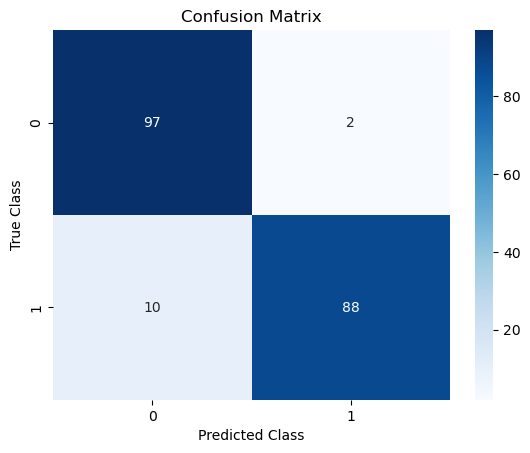

In [124]:
# Confusion matrix
conf_matrix = confusion_matrix(Y_test, X_test_prediction)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

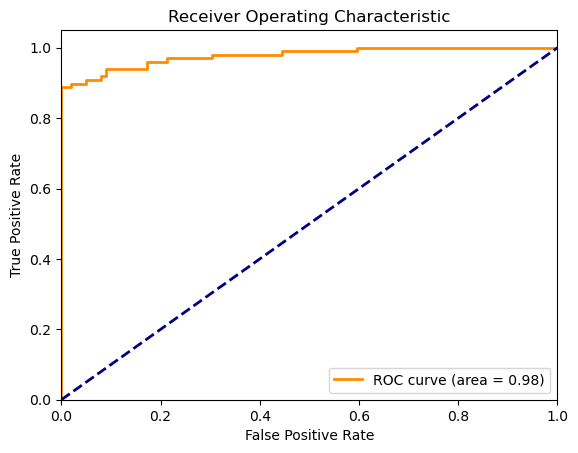

In [126]:
# ROC Curve
fpr, tpr, _ = roc_curve(Y_test, model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

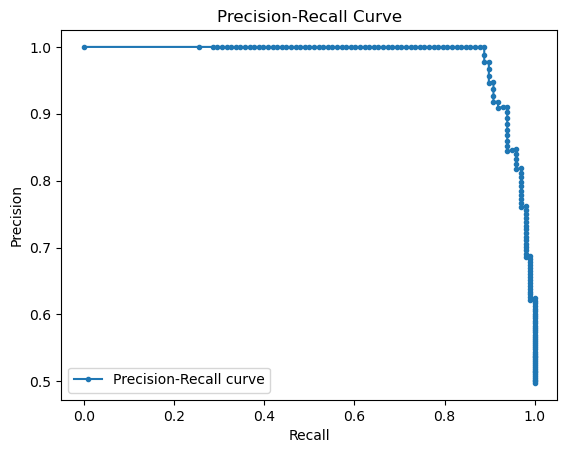

In [128]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(Y_test, model.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(recall, precision, marker='.', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()